In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#zahn = pd.read_csv(r'C:\Users\Frank\Desktop\PCIC\Tercer Semestre\zahnx.csv', header = None, sep = '\t', on_bad_lines = 'skip')
zahn = pd.read_csv(r'C:\Users\FLopezP\Desktop\PCIC\Tercer Semestre\zahnx.csv', header = None, sep = '\t', on_bad_lines = 'skip')
zahn = zahn.rename(columns = {0:"x", 1:"y"})
zahn.head()

,x,y
0,26.75,22.15
1,29.80,22.15
2,31.55,21.10
3,27.70,20.85
4,29.90,19.95


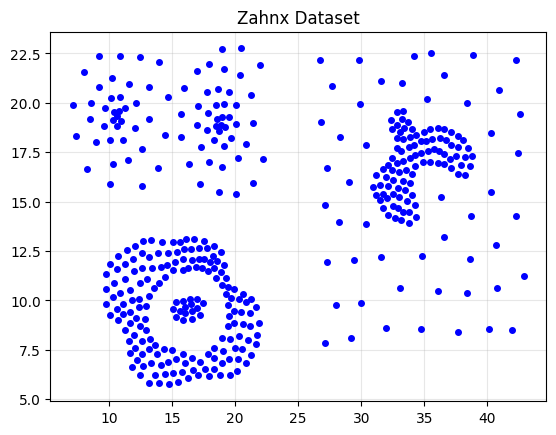

In [2]:
fig, ax = plt.subplots()
ax.plot(zahn['x'], zahn['y'], 'o', color = 'blue', markersize = 4)
ax.set_title('Zahnx Dataset')
ax.grid(True, alpha = 0.3)
plt.show()

In [3]:
import numpy as np
from numpy import linalg as la

diam = 0
full_list = []
for i in range(len(zahn['x'])):
    current_val = np.array([zahn['x'][i], zahn['y'][i]])
    current_dist = []
    for j in range(i+1, len(zahn['x'])):
        compare_val = np.array([zahn['x'][j], zahn['y'][j]])
        value = current_val - compare_val
        dist = la.norm(value)
        current_dist.append(dist)
        if dist > diam:
            diam = dist
    full_list.append(current_dist)
print(diam)
print(len(full_list) == len(zahn['x']))

36.781585066443235
True


In [4]:
# n = 10, pero este parámetro se puede variar.
r_distancias = [round(i/diam, 3) for i in range(1,36)]
pi_frac = [0.01, 0.02, 0.05, 0.1]

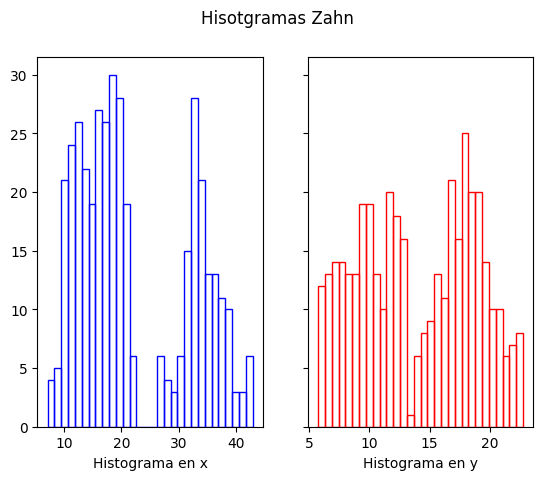

In [5]:
fig, ax = plt.subplots(1, 2, sharey = True)
ax[0].hist(zahn['x'], bins = 30, fill = False, edgecolor = 'blue')
ax[1].hist(zahn['y'], bins = 30, fill = False, edgecolor = 'red')
ax[0].set_xlabel('Histograma en x')
ax[1].set_xlabel('Histograma en y')
fig.suptitle('Hisotgramas Zahn')
plt.show()

In [6]:
def db_anom(center, dist_r, frac_pi):
    """
    Regresa True solo si el centro es anomalía.
    """
    close = []
    far = []
    for i in range(len(zahn['x'])):
        current_point = np.array([zahn['x'][i], zahn['y'][i]])
        dist_to_center = np.linalg.norm(center - current_point)/diam
        if dist_to_center > dist_r:
            far.append(current_point)
        else:
            close.append(current_point)
    if len(far)/len(zahn['x']) > frac_pi:
        return True
    else:
        return False

centro = np.array([zahn['x'][5], zahn['y'][5]])
print(db_anom(centro, r_distancias[2], 0.01))

True


In [7]:
def get_full_list(r_dist, frac_pi):
    anom_val = []
    for i in range(len(zahn['x'])):
        centro = np.array([zahn['x'][i], zahn['y'][i]])
        if db_anom(centro, r_dist, frac_pi):
            anom_val.append(-1) # ANOMALÍA
        else:
            anom_val.append(1) # NORMAL
    return anom_val


aux = get_full_list(r_distancias[20], pi_frac[-1])

In [16]:
def complete_pipeline(r_dist, pi_frac):
    tags = get_full_list(r_dist, pi_frac)
    norm_x = [zahn['x'][i] if tags[i] == 1 else None for i in range(len(zahn['x']))]
    norm_y = [zahn['y'][i] if tags[i] == 1 else None for i in range(len(zahn['x']))]
    
    anom_x = [zahn['x'][i] if tags[i] == -1 else None for i in range(len(zahn['x']))]
    anom_y = [zahn['y'][i] if tags[i] == -1 else None for i in range(len(zahn['x']))]
    while (None in norm_x) and (None in norm_y) and (None in anom_x) and (None in anom_y):
        try:
            norm_x.remove(None)
            norm_y.remove(None)
            anom_x.remove(None)
            anom_y.remove(None)
        except:
            continue

    if len(anom_x) == len(zahn['x']):
        print('Todo anomalías.')
        print('R Distance: {}'.format(r_dist))
        print('Pi: {}'.format(pi_frac))
        print('-------')
        return
    print('Cantidad de anomalías: {}'.format(len(anom_x)))
    fig, ax = plt.subplots()
    ax.plot(norm_x, norm_y, 'o', color = 'blue', markersize = 4, label = 'Normal')
    ax.plot(anom_x, anom_y, 'o', color = 'red', markersize = 4, label = 'Anomalía')
    ax.legend(loc = 'best', fontsize = 8)
    ax.set_title('Pi = {}, R = {}'.format(pi_frac, r_dist))
    ax.grid(True, alpha = 0.3)
    plt.show()

Todo anomalías.
R Distance: 0.027
Pi: 0.01
-------
Todo anomalías.
R Distance: 0.027
Pi: 0.02
-------
Todo anomalías.
R Distance: 0.027
Pi: 0.05
-------
Todo anomalías.
R Distance: 0.027
Pi: 0.1
-------
Todo anomalías.
R Distance: 0.054
Pi: 0.01
-------
Todo anomalías.
R Distance: 0.054
Pi: 0.02
-------
Todo anomalías.
R Distance: 0.054
Pi: 0.05
-------
Todo anomalías.
R Distance: 0.054
Pi: 0.1
-------
Todo anomalías.
R Distance: 0.082
Pi: 0.01
-------
Todo anomalías.
R Distance: 0.082
Pi: 0.02
-------
Todo anomalías.
R Distance: 0.082
Pi: 0.05
-------
Todo anomalías.
R Distance: 0.082
Pi: 0.1
-------
Todo anomalías.
R Distance: 0.109
Pi: 0.01
-------
Todo anomalías.
R Distance: 0.109
Pi: 0.02
-------
Todo anomalías.
R Distance: 0.109
Pi: 0.05
-------
Todo anomalías.
R Distance: 0.109
Pi: 0.1
-------
Todo anomalías.
R Distance: 0.136
Pi: 0.01
-------
Todo anomalías.
R Distance: 0.136
Pi: 0.02
-------
Todo anomalías.
R Distance: 0.136
Pi: 0.05
-------
Todo anomalías.
R Distance: 0.136
P

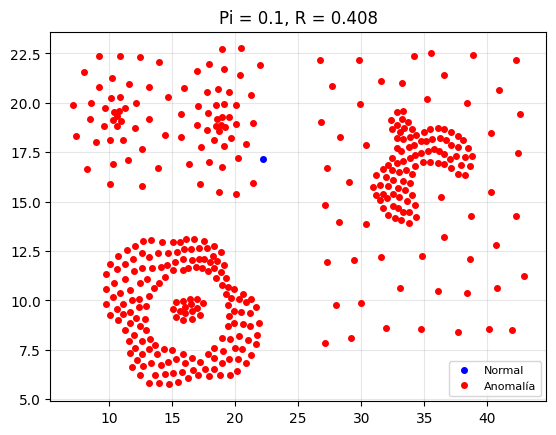

Todo anomalías.
R Distance: 0.435
Pi: 0.01
-------
Todo anomalías.
R Distance: 0.435
Pi: 0.02
-------
Todo anomalías.
R Distance: 0.435
Pi: 0.05
-------
Cantidad de anomalías: 395


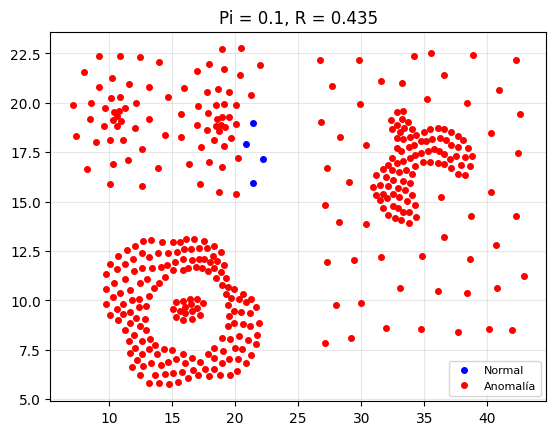

Todo anomalías.
R Distance: 0.462
Pi: 0.01
-------
Todo anomalías.
R Distance: 0.462
Pi: 0.02
-------
Cantidad de anomalías: 398


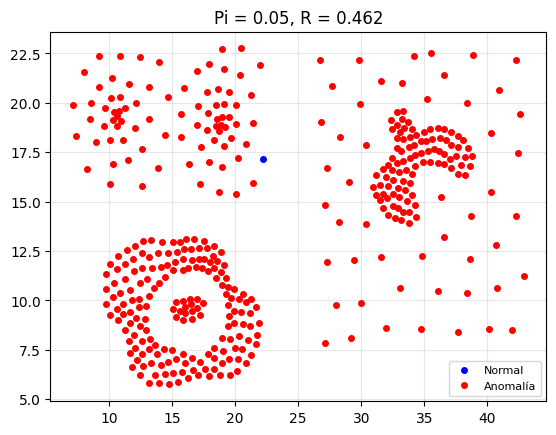

Cantidad de anomalías: 387


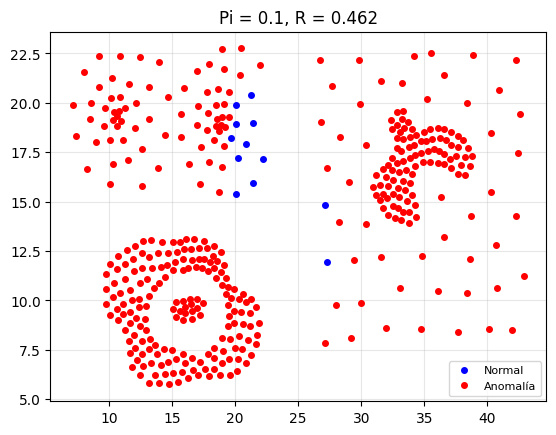

Todo anomalías.
R Distance: 0.489
Pi: 0.01
-------
Todo anomalías.
R Distance: 0.489
Pi: 0.02
-------
Cantidad de anomalías: 392


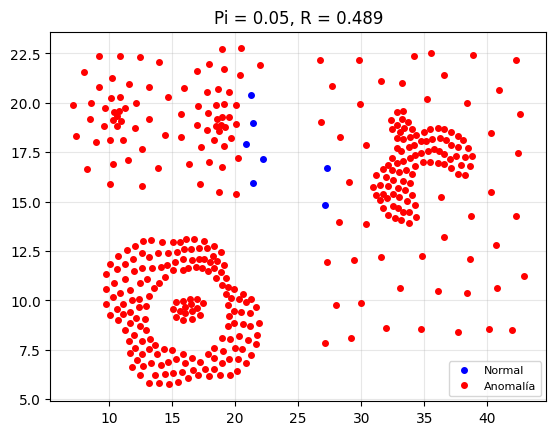

Cantidad de anomalías: 359


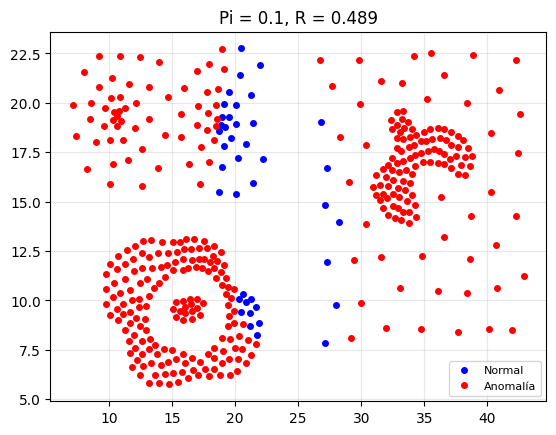

Cantidad de anomalías: 398


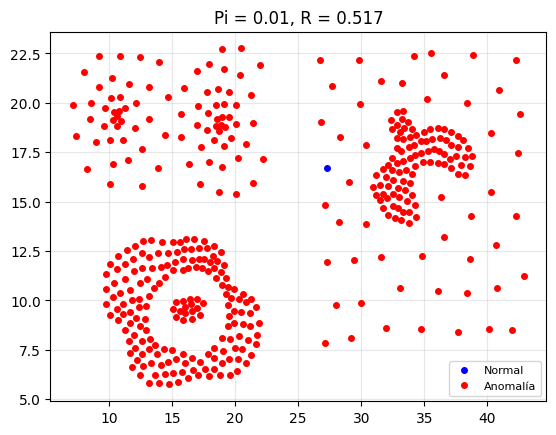

Cantidad de anomalías: 397


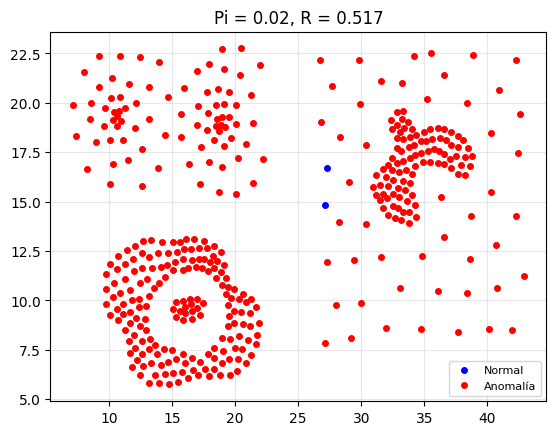

Cantidad de anomalías: 375


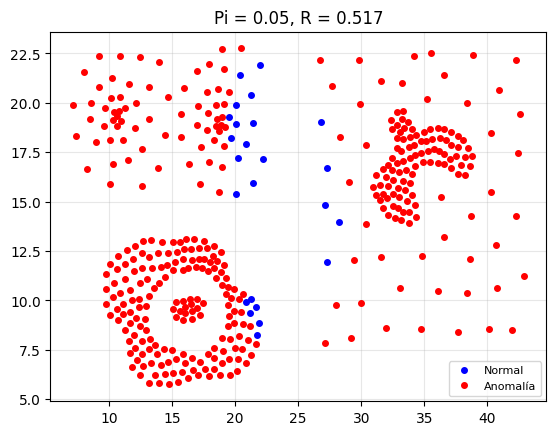

Cantidad de anomalías: 324


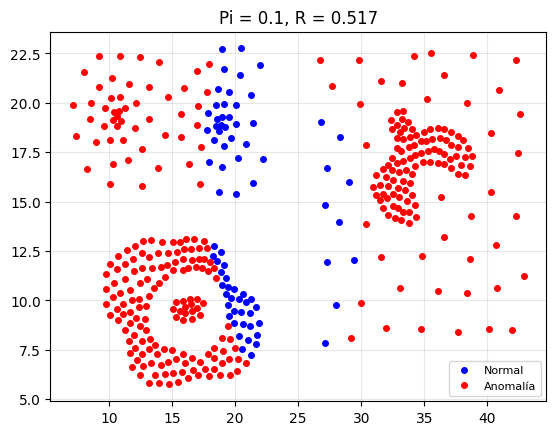

Cantidad de anomalías: 396


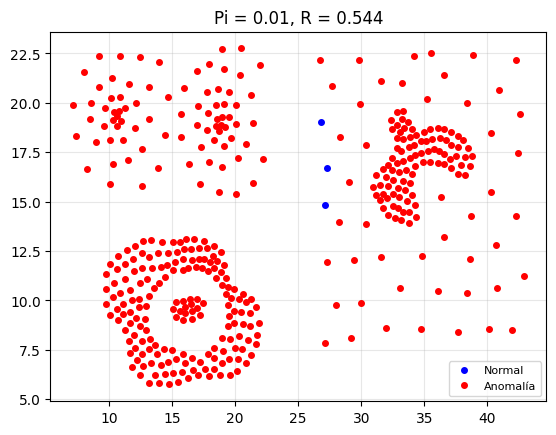

Cantidad de anomalías: 394


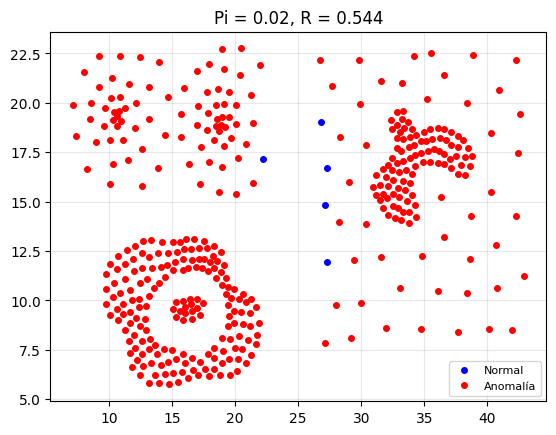

Cantidad de anomalías: 348


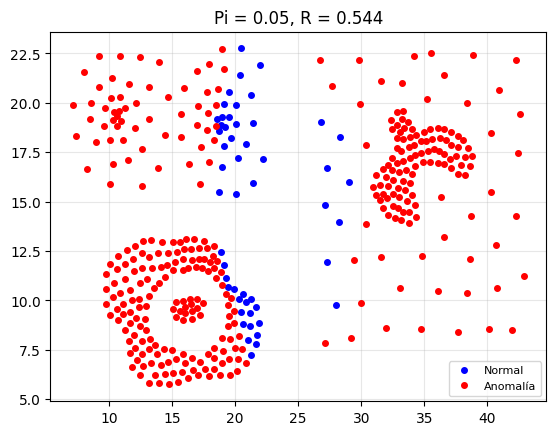

Cantidad de anomalías: 296


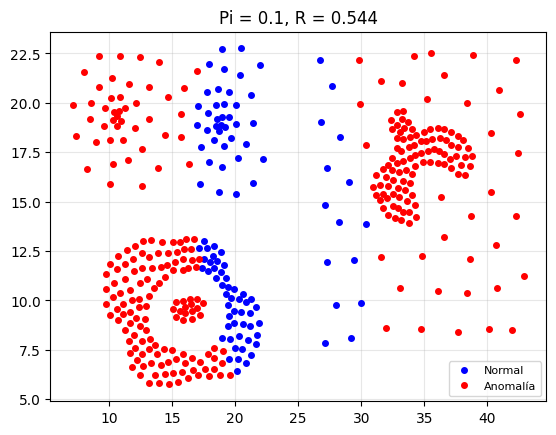

Cantidad de anomalías: 391


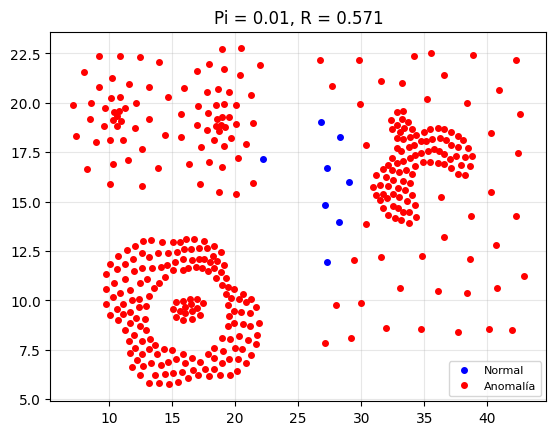

Cantidad de anomalías: 384


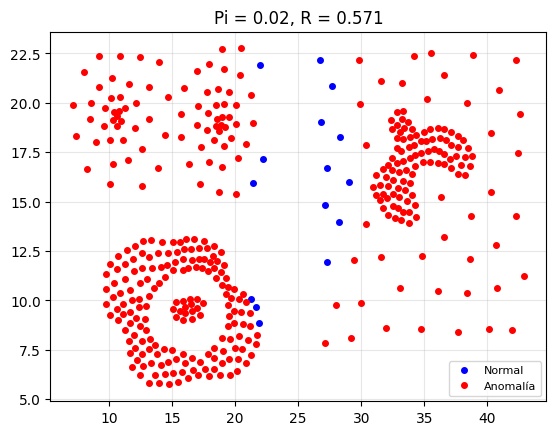

Cantidad de anomalías: 311


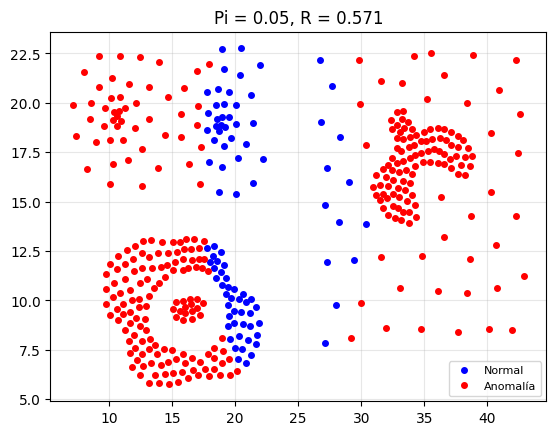

Cantidad de anomalías: 268


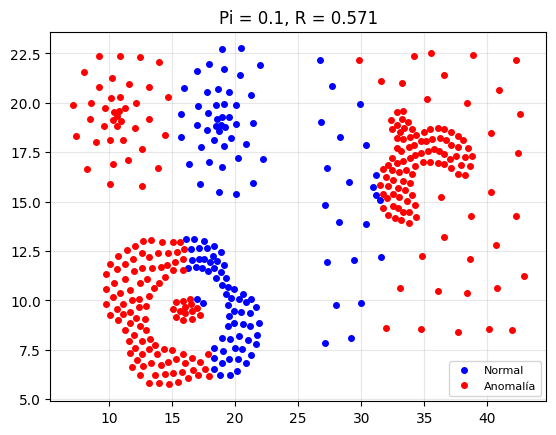

Cantidad de anomalías: 384


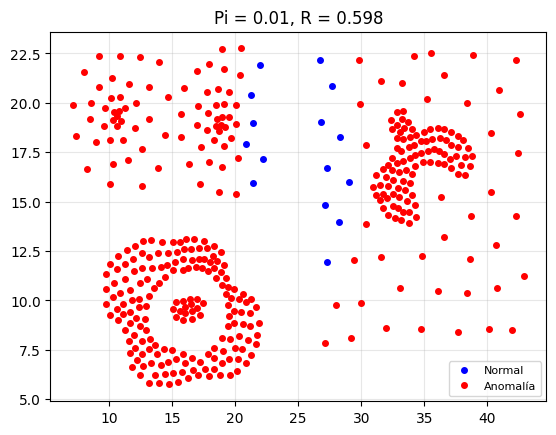

Cantidad de anomalías: 365


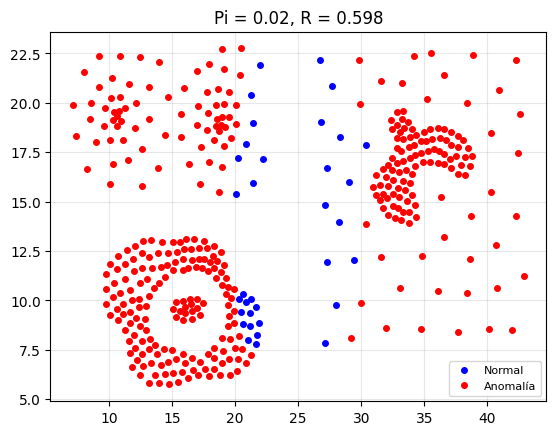

Cantidad de anomalías: 281


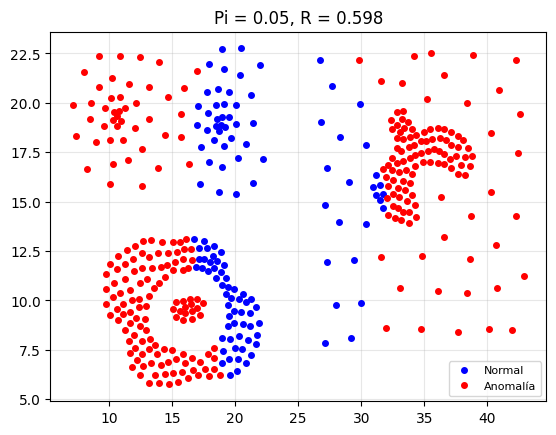

Cantidad de anomalías: 238


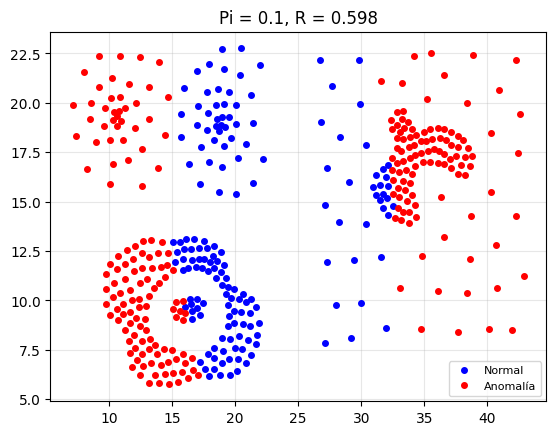

Cantidad de anomalías: 362


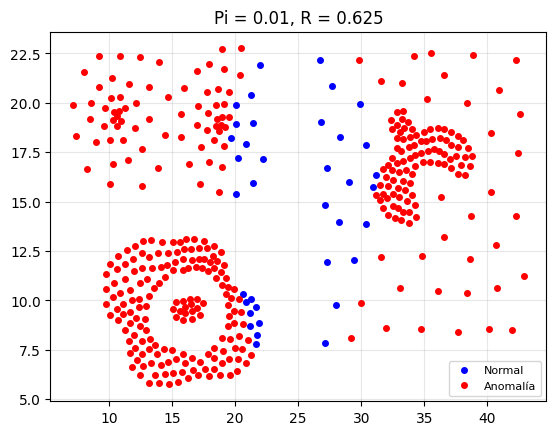

Cantidad de anomalías: 327


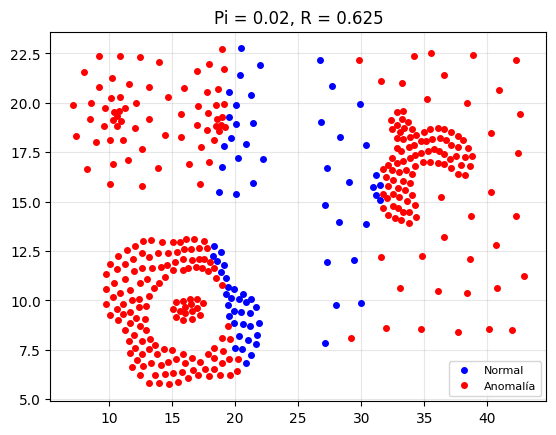

Cantidad de anomalías: 245


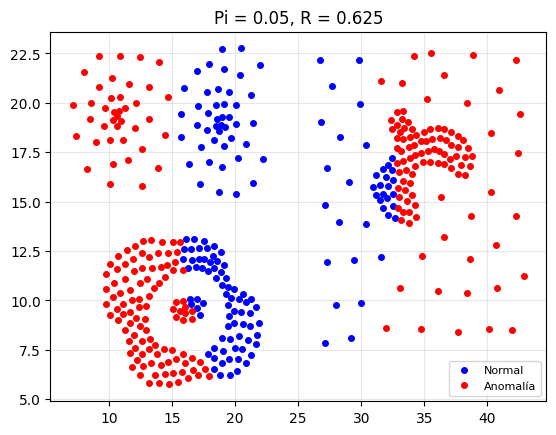

Cantidad de anomalías: 200


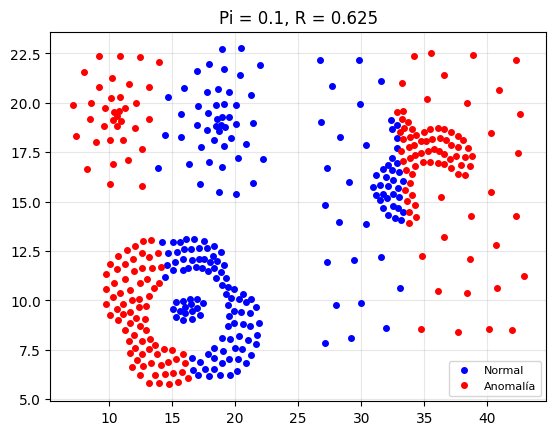

Cantidad de anomalías: 328


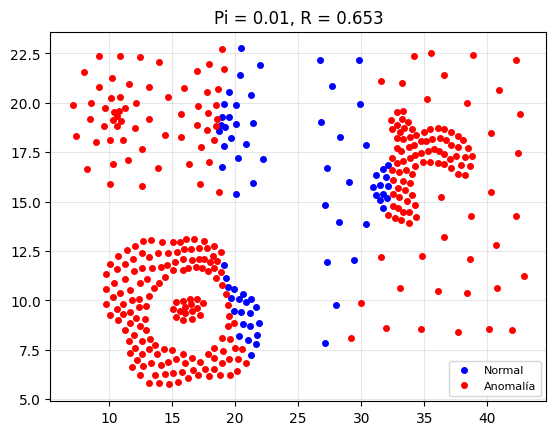

Cantidad de anomalías: 280


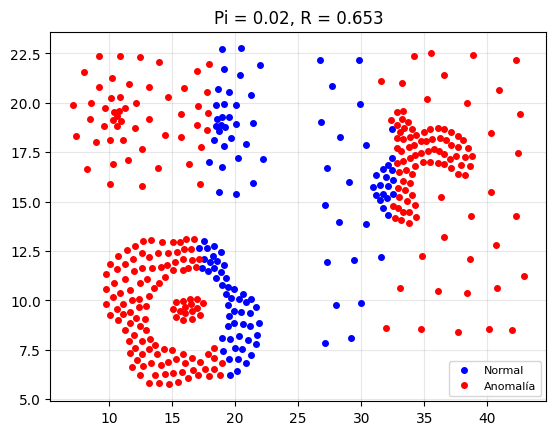

Cantidad de anomalías: 201


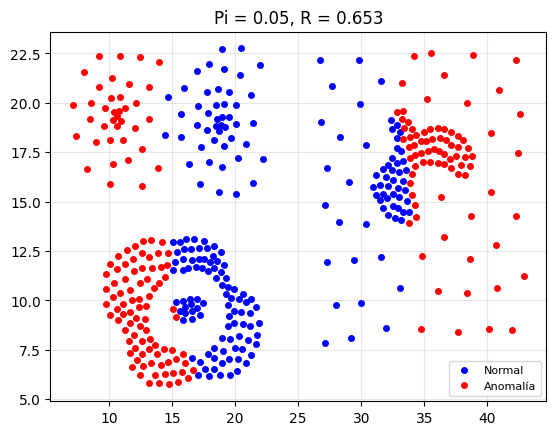

Cantidad de anomalías: 242


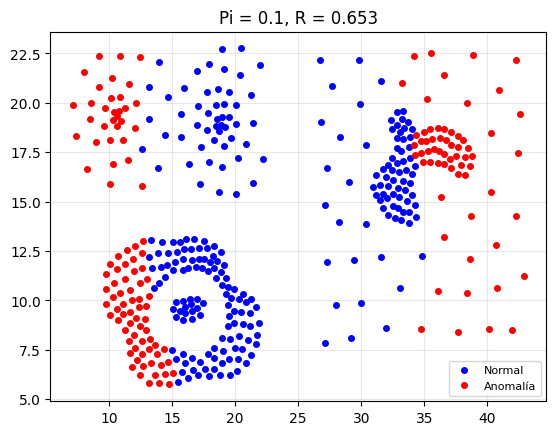

Cantidad de anomalías: 273


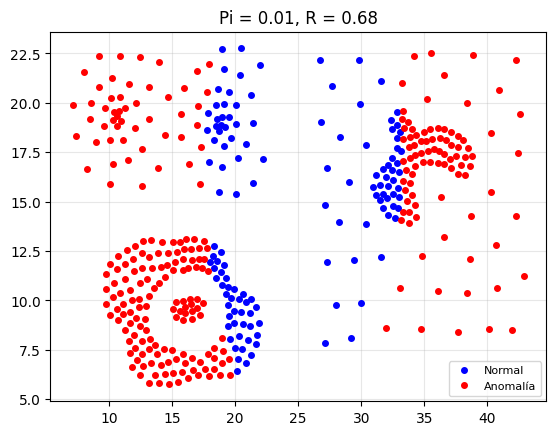

Cantidad de anomalías: 233


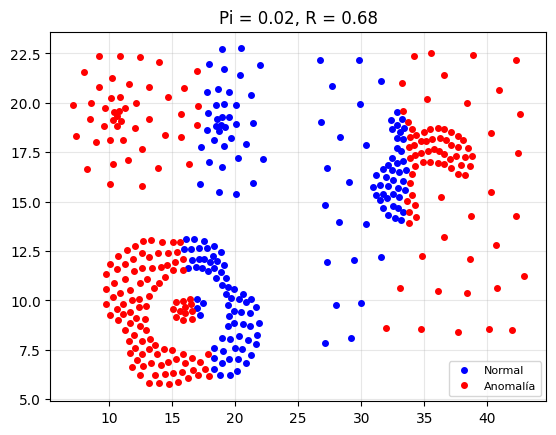

Cantidad de anomalías: 233


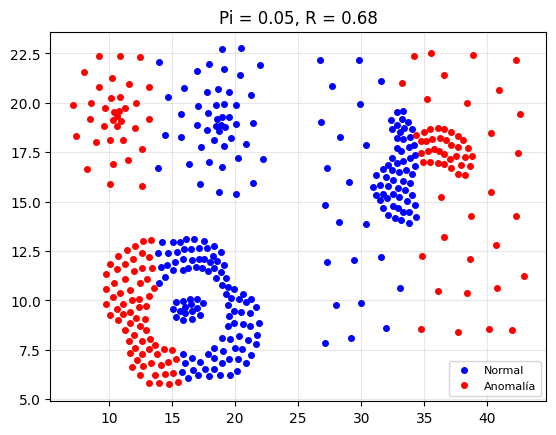

Cantidad de anomalías: 271


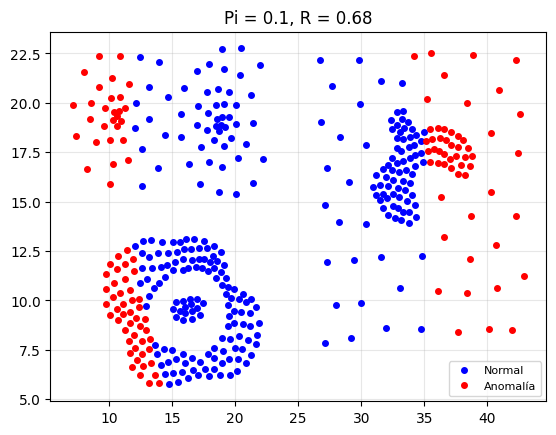

Cantidad de anomalías: 231


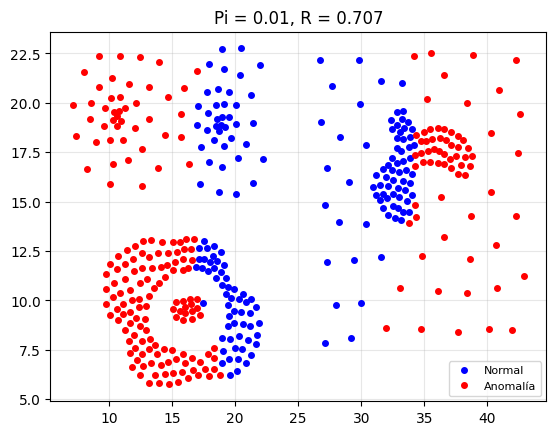

Cantidad de anomalías: 207


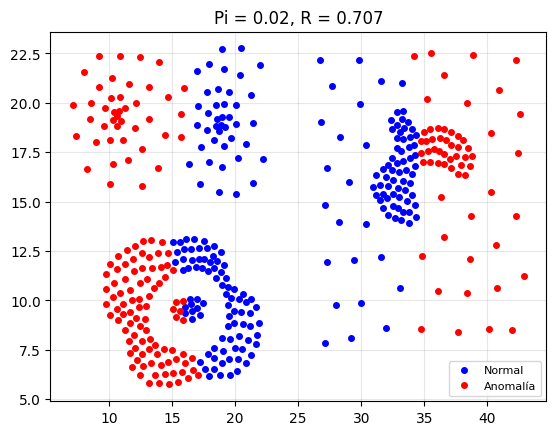

Cantidad de anomalías: 259


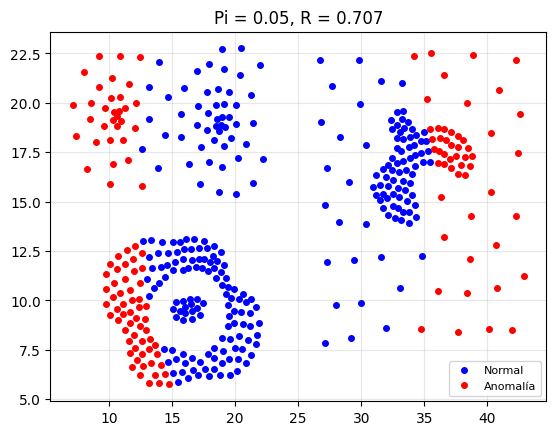

Cantidad de anomalías: 312


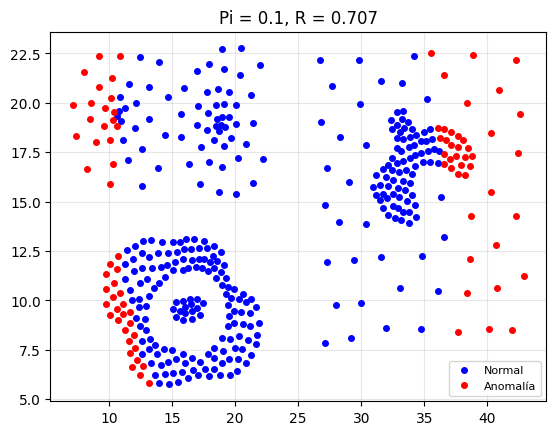

Cantidad de anomalías: 204


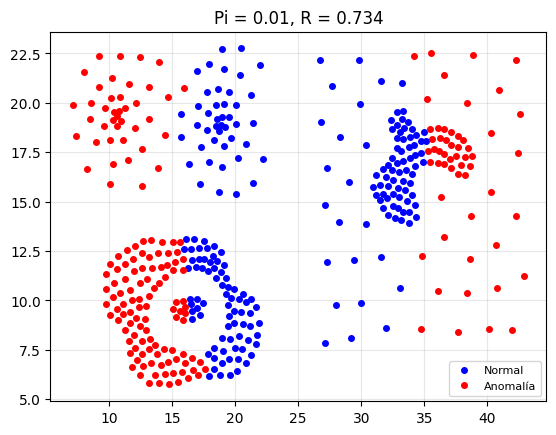

Cantidad de anomalías: 237


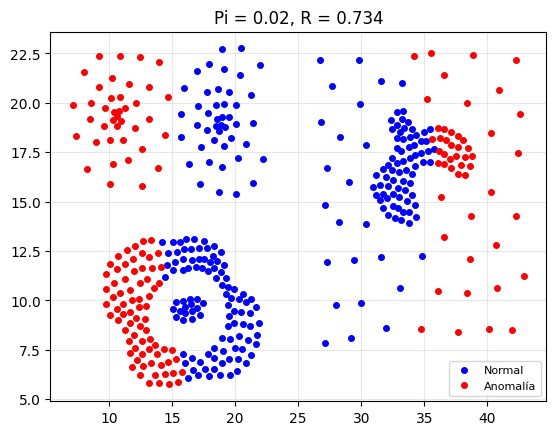

Cantidad de anomalías: 298


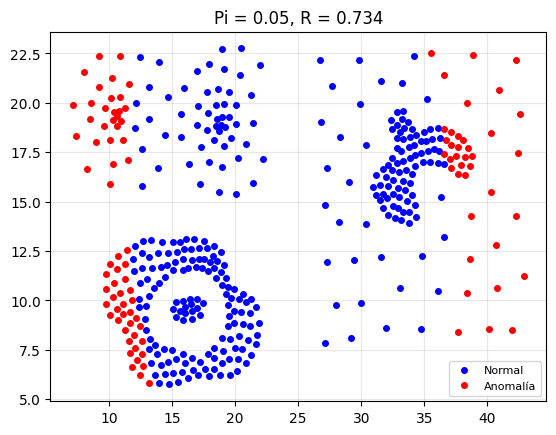

Cantidad de anomalías: 350


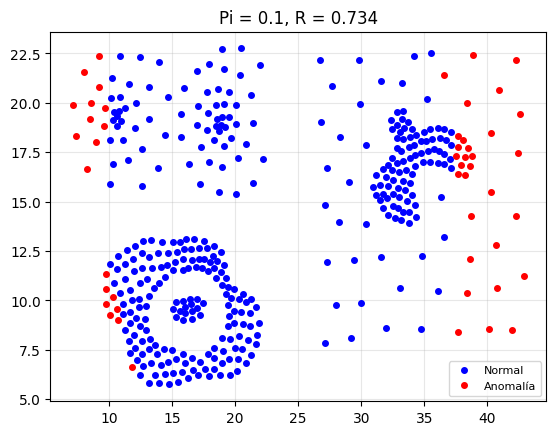

Cantidad de anomalías: 234


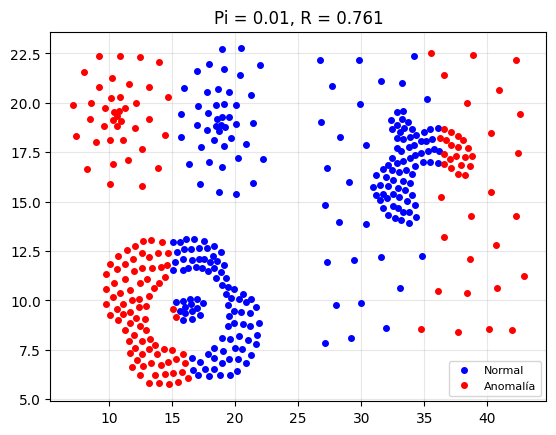

Cantidad de anomalías: 263


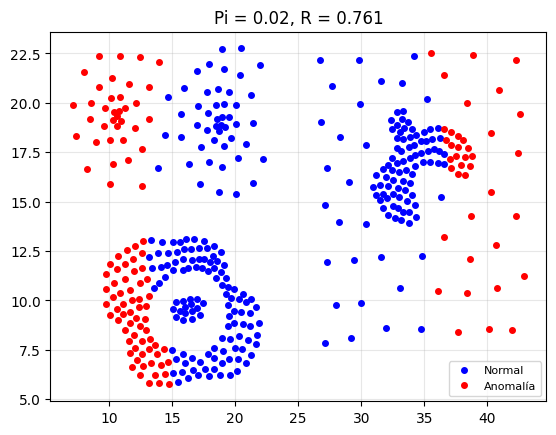

Cantidad de anomalías: 335


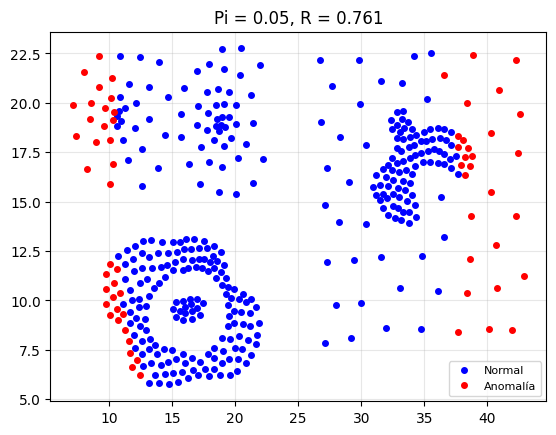

Cantidad de anomalías: 376


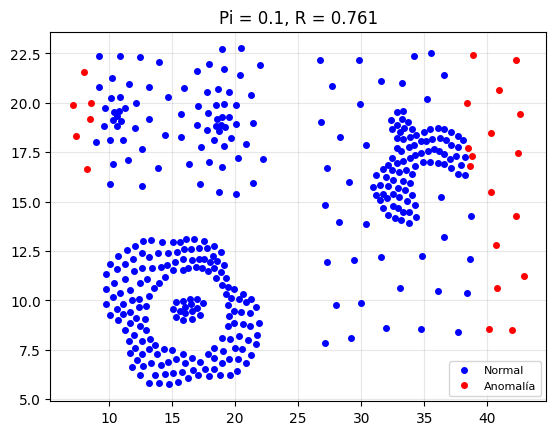

Cantidad de anomalías: 261


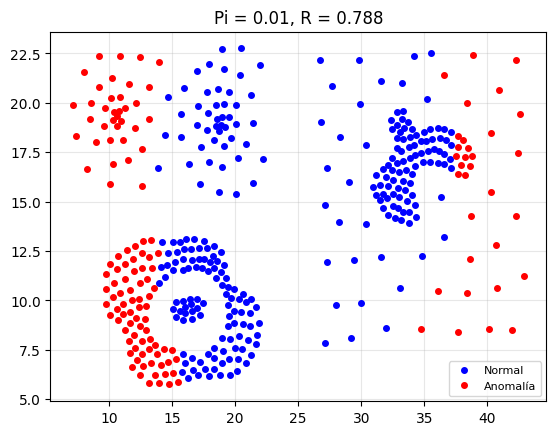

Cantidad de anomalías: 296


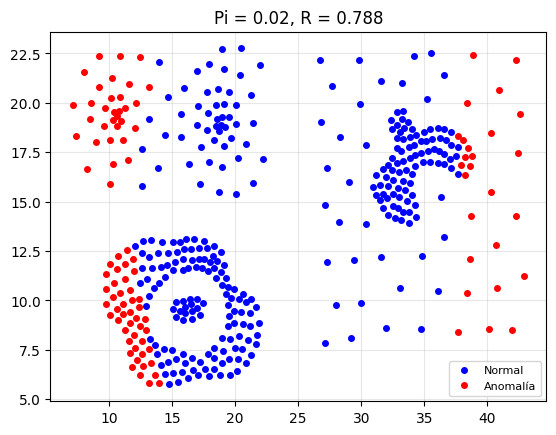

Cantidad de anomalías: 369


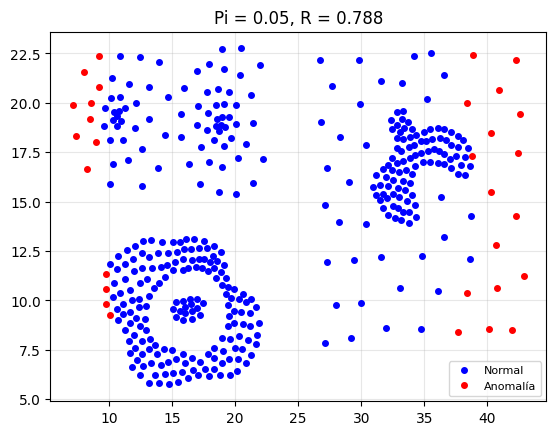

Cantidad de anomalías: 384


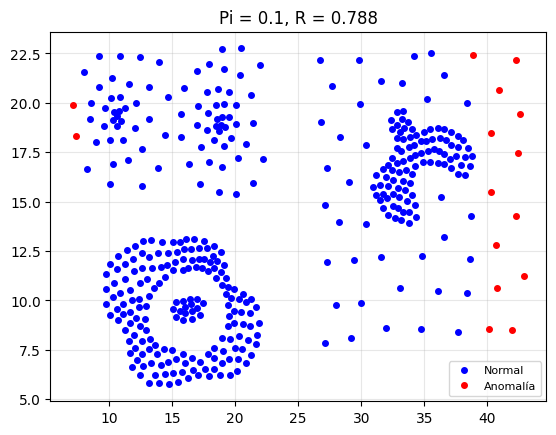

Cantidad de anomalías: 289


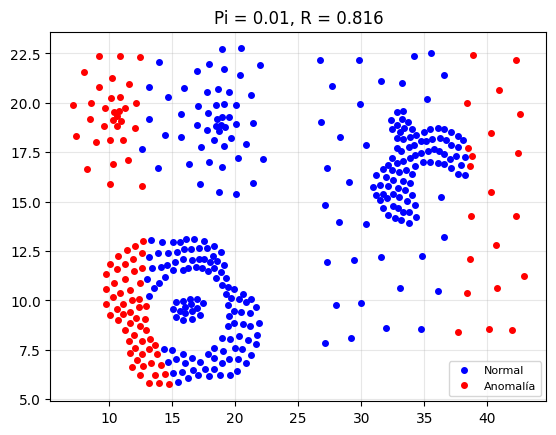

Cantidad de anomalías: 330


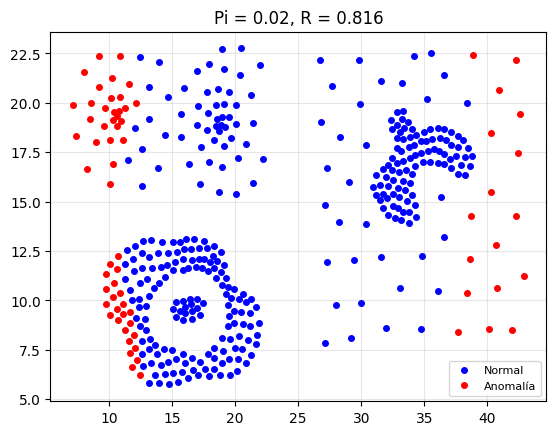

Cantidad de anomalías: 382


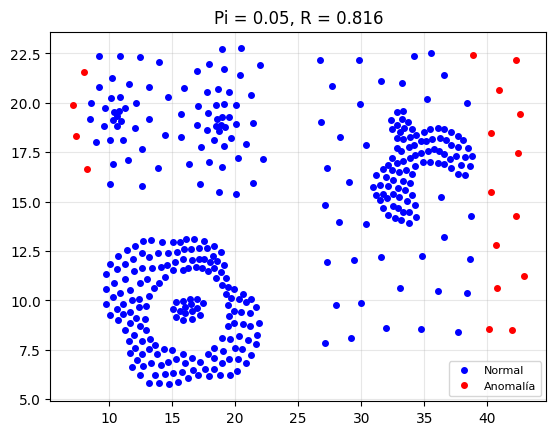

Cantidad de anomalías: 391


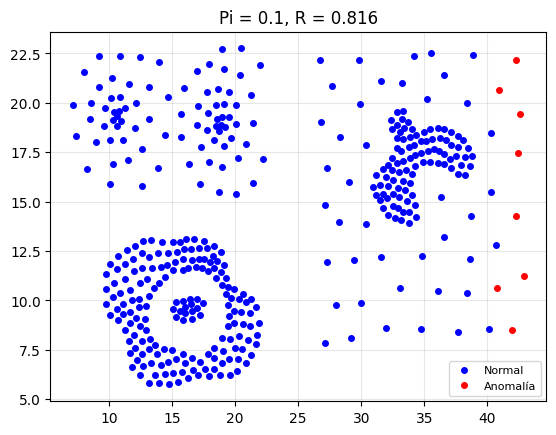

Cantidad de anomalías: 320


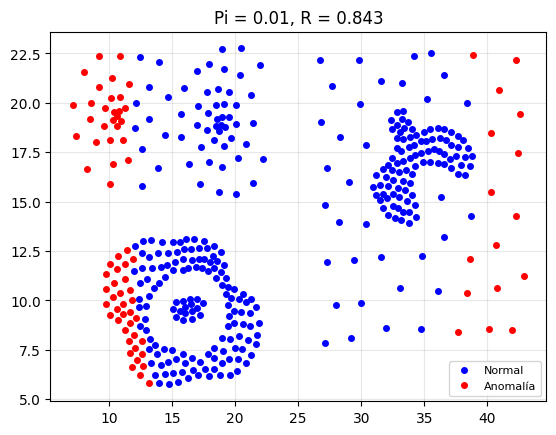

Cantidad de anomalías: 357


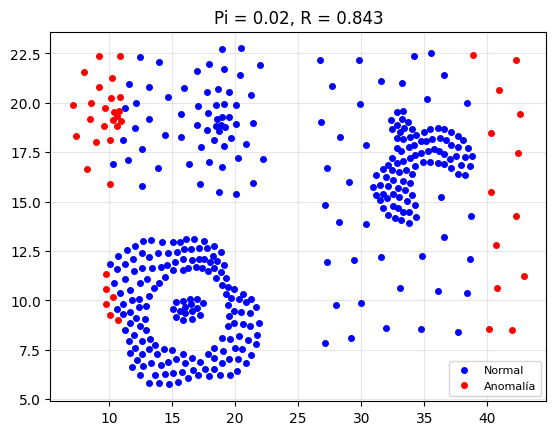

Cantidad de anomalías: 388


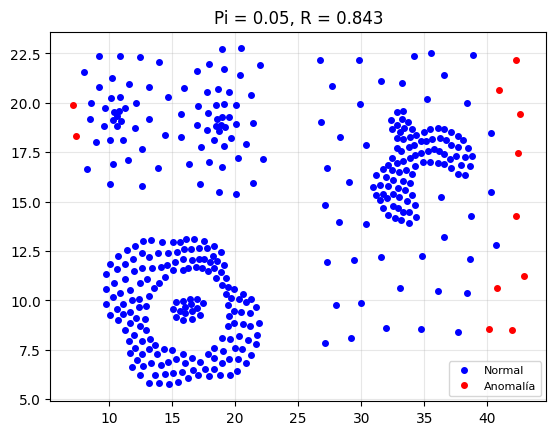

Cantidad de anomalías: 392


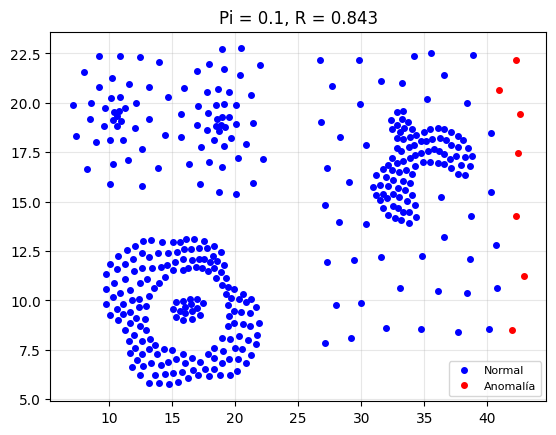

Cantidad de anomalías: 352


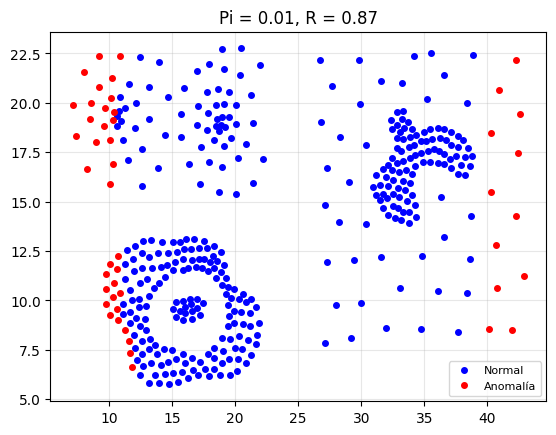

Cantidad de anomalías: 376


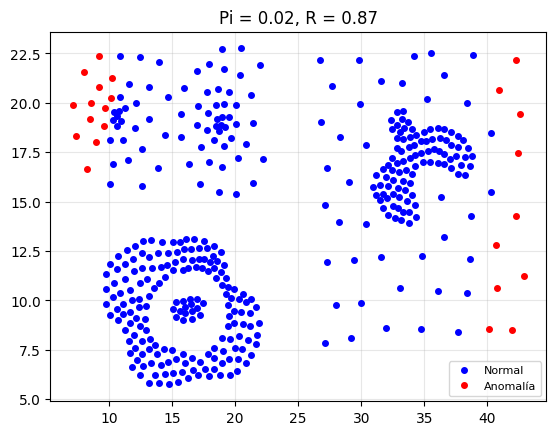

Cantidad de anomalías: 392


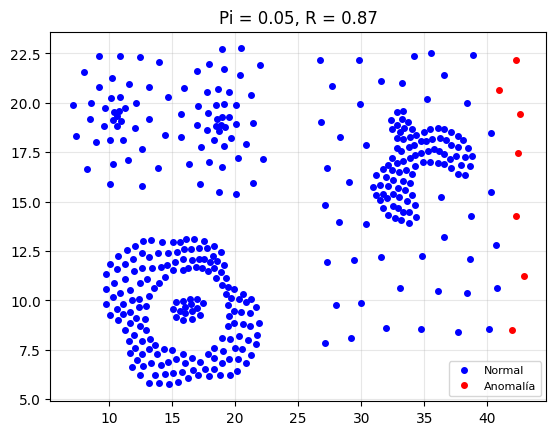

Cantidad de anomalías: 396


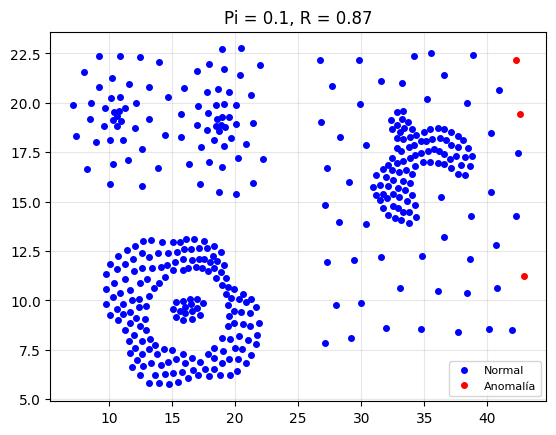

Cantidad de anomalías: 379


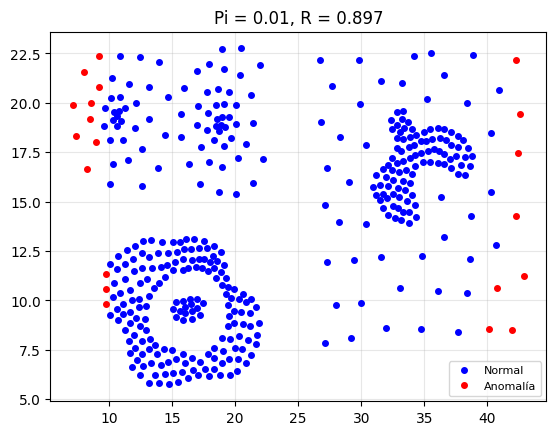

Cantidad de anomalías: 385


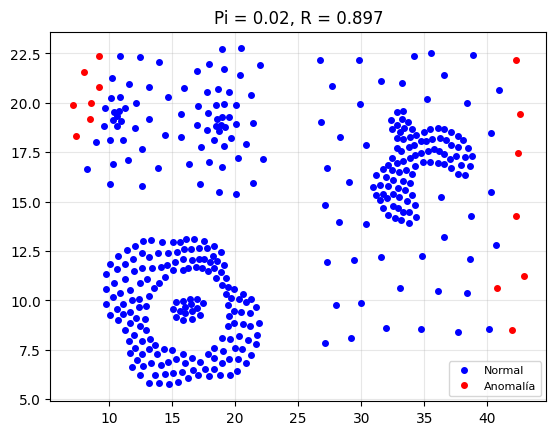

Cantidad de anomalías: 395


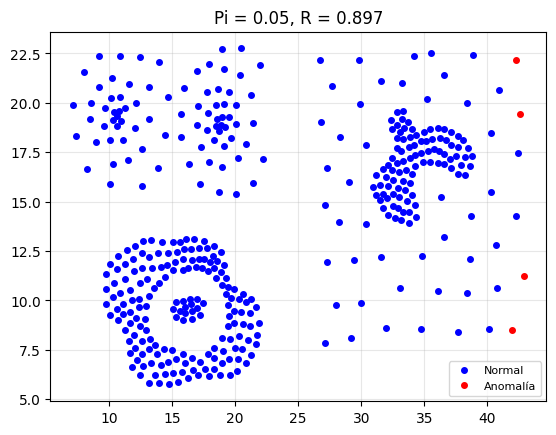

Todo anomalías.
R Distance: 0.897
Pi: 0.1
-------
Cantidad de anomalías: 387


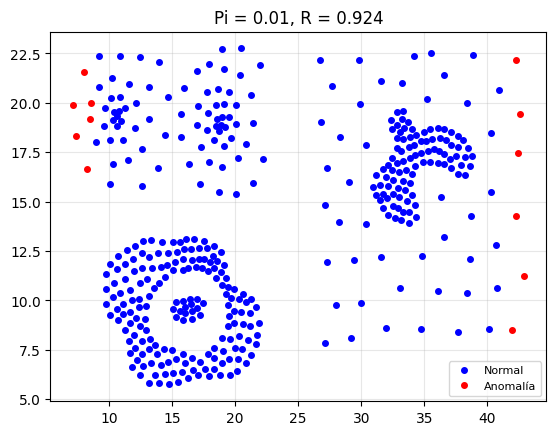

Cantidad de anomalías: 392


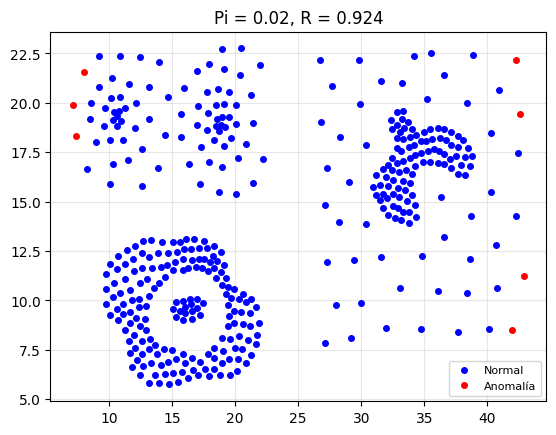

Todo anomalías.
R Distance: 0.924
Pi: 0.05
-------
Todo anomalías.
R Distance: 0.924
Pi: 0.1
-------
Cantidad de anomalías: 395


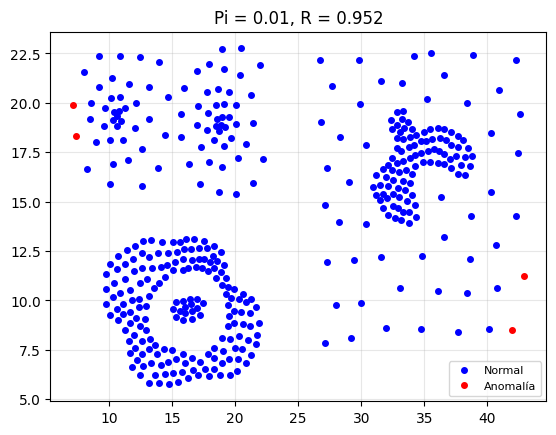

Cantidad de anomalías: 398


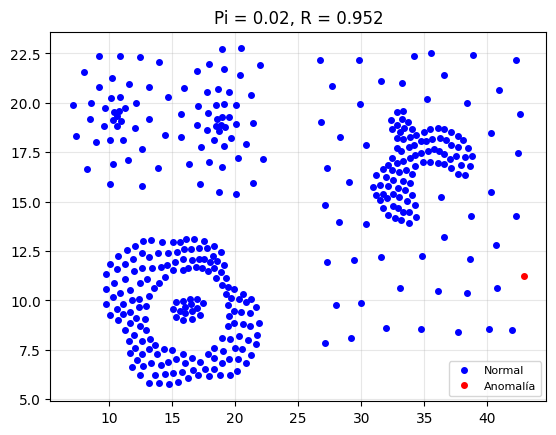

Todo anomalías.
R Distance: 0.952
Pi: 0.05
-------
Todo anomalías.
R Distance: 0.952
Pi: 0.1
-------


In [18]:
for _ in r_distancias:
    for p in pi_frac:
        complete_pipeline(_, p)